In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
(t_x,t_y),(tt_x,tt_y) = keras.datasets.fashion_mnist.load_data()
s_t_x= t_x/255.0
s_tt_x=tt_x/255.0
from sklearn.model_selection import train_test_split
t_x,v_x,t_y,v_y=train_test_split(s_t_x,t_y,test_size=0.2,random_state=42)
t_x.shape[1:]

(28, 28)

In [2]:
def my_mf_m(l=None):
    m=keras.Sequential()
    m.add(keras.layers.Flatten(input_shape=(28,28)))
    if l:
        for i in l:
            m.add(l)
    m.add(keras.layers.Dense(10,activation='softmax'))
    m.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics='accuracy')
    return m

In [3]:
m=keras.Sequential()

In [4]:
m=keras.Sequential()
m.add(keras.layers.Flatten(input_shape=(28,28)))
m.add(keras.layers.Dense(100,activation='relu'))
m.add(keras.layers.Dropout(0.3))
m.add(keras.layers.Dense(10,activation='softmax'))
#신경망구축
m.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics='accuracy')
#콜백
ck_p=keras.callbacks.ModelCheckpoint('best_m.h',save_best_only=True)#콜백함수
hy=m.fit(t_x,t_y,epochs=20,validation_data=(v_x,v_y),callbacks=[ck_p])



Epoch 1/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5925 - accuracy: 0.7914 - val_loss: 0.4266 - val_accuracy: 0.8487
Epoch 2/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4366 - accuracy: 0.8424 - val_loss: 0.3946 - val_accuracy: 0.8583
Epoch 3/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4028 - accuracy: 0.8544 - val_loss: 0.3631 - val_accuracy: 0.8664
Epoch 4/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3804 - accuracy: 0.8597 - val_loss: 0.3426 - val_accuracy: 0.8769
Epoch 5/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3659 - accuracy: 0.8644 - val_loss: 0.3456 - val_accuracy: 0.8705
Epoch 6/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3531 - accuracy: 0.8700 - val_loss: 0.3320 - val_accuracy: 0.8797
Epoch 7/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3443 - accuracy: 0.8743 - val_loss: 0.3351 - val_accuracy:

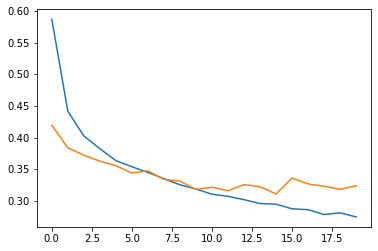

In [5]:
plt.plot(hy.history['loss'])
plt.plot(hy.history['val_loss'])

In [6]:
m2=keras.models.load_model('best_m.h')
m.evaluate(v_x,v_y)

375/375 [==============================] - 0s 1ms/step - loss: 0.3241 - accuracy: 0.8822


[0.3240850865840912, 0.8821666836738586]

In [7]:
m2.evaluate(v_x,v_y)

375/375 [==============================] - 1s 1ms/step - loss: 0.3111 - accuracy: 0.8873


[0.3111457824707031, 0.8872500061988831]

In [12]:
m1=s_my_m([
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dropout(0.3)
])

ck_p=keras.callbacks.ModelCheckpoint('best_m.h',save_best_only=True)#콜백함수
e_st=keras.callbacks.EarlyStopping(patience=2)#검증점수가 몇번변화하지 않을경우 3을 입력할경우 3번 검증 성능이 오르지 않고 떠러지면 곡선이 연속적으로 발산예측멈춤
m1.fit(t_x,t_y,epochs=20,validation_data=(v_x,v_y),callbacks=[ck_p])


NameError: name 's_my_m' is not defined

In [17]:
m1=keras.Sequential()
m1.add(keras.layers.Flatten(input_shape=(28,28)))
m1.add(keras.layers.Dense(100,activation='relu'))
m1.add(keras.layers.Dropout(0.3))
m1.add(keras.layers.Dense(10,activation='softmax'))
#신경망구축
m1.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics='accuracy')
#콜백
ck_p=keras.callbacks.ModelCheckpoint('best1_m.h',save_best_only=True)#콜백함수
e_st=keras.callbacks.EarlyStopping(patience=2,restore_best_weights=True)
m1.fit(t_x,t_y,epochs=20,validation_data=(v_x,v_y),callbacks=[ck_p,e_st])

Epoch 1/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5964 - accuracy: 0.7912 - val_loss: 0.4268 - val_accuracy: 0.8444
Epoch 2/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4415 - accuracy: 0.8408 - val_loss: 0.4014 - val_accuracy: 0.8497
Epoch 3/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4034 - accuracy: 0.8539 - val_loss: 0.3638 - val_accuracy: 0.8669
Epoch 4/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3818 - accuracy: 0.8586 - val_loss: 0.3491 - val_accuracy: 0.8733
Epoch 5/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3677 - accuracy: 0.8662 - val_loss: 0.3477 - val_accuracy: 0.8740
Epoch 6/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3556 - accuracy: 0.8689 - val_loss: 0.3476 - val_accuracy: 0.8743
Epoch 7/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3432 - accuracy: 0.8709 - val_loss: 0.3437 - val_accuracy:

In [18]:
m1.evaluate(v_x,v_y)#검증데이터의 값 확인

375/375 [==============================] - 1s 2ms/step - loss: 0.3145 - accuracy: 0.8882


[0.31450751423835754, 0.8881666660308838]

In [20]:
m2=keras.models.load_model('best1_m.h')
m2.evaluate(v_x,v_y)

375/375 [==============================] - 1s 2ms/step - loss: 0.3145 - accuracy: 0.8882


[0.31450751423835754, 0.8881666660308838]

(-5.0, 5.0, -0.2, 1.2)

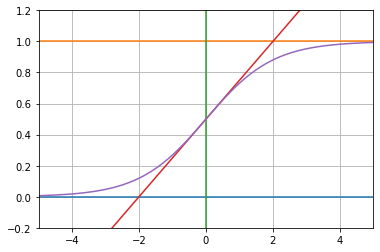

In [26]:
def sig(x):
    return 1/(1+np.exp(-x)) # 시그모이드펑션
x=np.linspace(-5,5,200)
plt.plot([-5,5],[0,0])
plt.plot([-5,5],[1,1])
plt.plot([0,0],[-0.2,1.2])
plt.plot([-5,5],[-3/4,7/4])
plt.plot(x,sig(x))
plt.grid(True)
plt.axis([-5,5,-0.2,1.2])